In [1]:
#importing python script having all required libraries imported
# script also contains a function to clean and generate tokenized tweets 
from tweet_cleaning import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
#importing tweets
data= pd.read_csv(r'https://raw.githubusercontent.com/akramshaik2326/Dataset/master/covid_latlog.csv', usecols=['created_at','text'])
print(data.shape)
data.head()

(59461, 2)


,created_at,text
0,2020-01-26 03:55:30,RT @mkhairulazri: Although I may agree on not ...
1,2020-01-26 01:56:44,RT @CP24: UPDATED: Man who flew to Toronto fro...
2,2020-01-25 06:47:27,RT @hrluqman: Googled bout the #Coronavirus ju...
3,2020-01-24 02:55:26,@michaeljohns Nothing about #wuhan #virus on t...
4,2020-01-28 11:20:55,RT @DarienAlexis3: White people are really mak...


In [22]:
# clean is a function defined in a python script, it applies all preprocessing steps to clean and generates tokenized tweets
data['Tweets'] = data['text'].apply(clean)
data.head(10)

,created_at,text,Tweets,neg,neu,pos,compound,Analysis,month
0,2020-01-26 03:55:30,RT @mkhairulazri: Although I may agree on not ...,"[may, agree, total, ban, china, tourists, mala...",0.275,0.534,0.191,-0.2732,Neutral,1
1,2020-01-26 01:56:44,RT @CP24: UPDATED: Man who flew to Toronto fro...,"[updated, man, flew, toronto, china, canadas, ...",0.000,1.000,0.000,0.0000,Neutral,1
2,2020-01-25 06:47:27,RT @hrluqman: Googled bout the #Coronavirus ju...,"[googled, bout, find, world, plague, every, st...",0.000,1.000,0.000,0.0000,Neutral,1
3,2020-01-24 02:55:26,@michaeljohns Nothing about #wuhan #virus on t...,"[nothing, front, page, thursday, peoples, dail...",0.000,1.000,0.000,0.0000,Neutral,1
4,2020-01-28 11:20:55,RT @DarienAlexis3: White people are really mak...,"[white, people, really, making, jokes, outbrea...",0.000,0.754,0.246,0.3134,Neutral,1
5,2020-01-28 06:20:02,RT @Eco11C: #coronavirus timeline-\nJan 16- 40...,"[timeline, jan, confirmed, cases, jan, sick, j...",0.686,0.314,0.000,-0.9552,Negative,1
6,2020-01-28 03:37:26,RT @OH_mes2: Coronavirus is spreading quite qu...,"[spreading, quite, quickly, throughout, world,...",0.000,0.446,0.554,0.8271,Positive,1
7,2020-01-27 18:45:09,RT @americaninwuhan: news from american consul...,"[news, american, consulate, plans, evacuate, y...",0.000,1.000,0.000,0.0000,Neutral,1
8,2020-01-28 19:08:48,RT @AimeeCho4: CORONAVIRUS: The @CDCgov says D...,"[says, dulles, airport, one, airports, additio...",0.000,1.000,0.000,0.0000,Neutral,1
9,2020-01-30 04:15:37,@brassmonkeymilw Can I get a lyme disease with...,"[get, disease, corona, virus]",0.000,1.000,0.000,0.0000,Neutral,1


In [23]:
# importing library to apply sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
data["sentiments"] = data['Tweets'].str.join(" ").apply(lambda x: sid.polarity_scores(x))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
data.head(10)

,created_at,text,Tweets,neg,neu,pos,compound,Analysis,month,sentiments
0,2020-01-26 03:55:30,RT @mkhairulazri: Although I may agree on not ...,"[may, agree, total, ban, china, tourists, mala...",0.275,0.534,0.191,-0.2732,Neutral,1,"{'neg': 0.275, 'neu': 0.534, 'pos': 0.191, 'co..."
1,2020-01-26 01:56:44,RT @CP24: UPDATED: Man who flew to Toronto fro...,"[updated, man, flew, toronto, china, canadas, ...",0.000,1.000,0.000,0.0000,Neutral,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2020-01-25 06:47:27,RT @hrluqman: Googled bout the #Coronavirus ju...,"[googled, bout, find, world, plague, every, st...",0.000,1.000,0.000,0.0000,Neutral,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2020-01-24 02:55:26,@michaeljohns Nothing about #wuhan #virus on t...,"[nothing, front, page, thursday, peoples, dail...",0.000,1.000,0.000,0.0000,Neutral,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2020-01-28 11:20:55,RT @DarienAlexis3: White people are really mak...,"[white, people, really, making, jokes, outbrea...",0.000,0.754,0.246,0.3134,Neutral,1,"{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'comp..."
5,2020-01-28 06:20:02,RT @Eco11C: #coronavirus timeline-\nJan 16- 40...,"[timeline, jan, confirmed, cases, jan, sick, j...",0.686,0.314,0.000,-0.9552,Negative,1,"{'neg': 0.686, 'neu': 0.314, 'pos': 0.0, 'comp..."
6,2020-01-28 03:37:26,RT @OH_mes2: Coronavirus is spreading quite qu...,"[spreading, quite, quickly, throughout, world,...",0.000,0.446,0.554,0.8271,Positive,1,"{'neg': 0.0, 'neu': 0.446, 'pos': 0.554, 'comp..."
7,2020-01-27 18:45:09,RT @americaninwuhan: news from american consul...,"[news, american, consulate, plans, evacuate, y...",0.000,1.000,0.000,0.0000,Neutral,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,2020-01-28 19:08:48,RT @AimeeCho4: CORONAVIRUS: The @CDCgov says D...,"[says, dulles, airport, one, airports, additio...",0.000,1.000,0.000,0.0000,Neutral,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,2020-01-30 04:15:37,@brassmonkeymilw Can I get a lyme disease with...,"[get, disease, corona, virus]",0.000,1.000,0.000,0.0000,Neutral,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [25]:
# polarity scores generate dictionary of positive, negative, neutral and compund values of tweets
# here we drop sentiments columns from data and replace it with its series
data = pd.concat([data.drop(['sentiments'], axis=1), data['sentiments'].apply(pd.Series)], axis=1)
data.head(10)

,created_at,text,Tweets,neg,neu,pos,compound,Analysis,month,neg,neu,pos,compound
0,2020-01-26 03:55:30,RT @mkhairulazri: Although I may agree on not ...,"[may, agree, total, ban, china, tourists, mala...",0.275,0.534,0.191,-0.2732,Neutral,1,0.275,0.534,0.191,-0.2732
1,2020-01-26 01:56:44,RT @CP24: UPDATED: Man who flew to Toronto fro...,"[updated, man, flew, toronto, china, canadas, ...",0.000,1.000,0.000,0.0000,Neutral,1,0.000,1.000,0.000,0.0000
2,2020-01-25 06:47:27,RT @hrluqman: Googled bout the #Coronavirus ju...,"[googled, bout, find, world, plague, every, st...",0.000,1.000,0.000,0.0000,Neutral,1,0.000,1.000,0.000,0.0000
3,2020-01-24 02:55:26,@michaeljohns Nothing about #wuhan #virus on t...,"[nothing, front, page, thursday, peoples, dail...",0.000,1.000,0.000,0.0000,Neutral,1,0.000,1.000,0.000,0.0000
4,2020-01-28 11:20:55,RT @DarienAlexis3: White people are really mak...,"[white, people, really, making, jokes, outbrea...",0.000,0.754,0.246,0.3134,Neutral,1,0.000,0.754,0.246,0.3134
5,2020-01-28 06:20:02,RT @Eco11C: #coronavirus timeline-\nJan 16- 40...,"[timeline, jan, confirmed, cases, jan, sick, j...",0.686,0.314,0.000,-0.9552,Negative,1,0.686,0.314,0.000,-0.9552
6,2020-01-28 03:37:26,RT @OH_mes2: Coronavirus is spreading quite qu...,"[spreading, quite, quickly, throughout, world,...",0.000,0.446,0.554,0.8271,Positive,1,0.000,0.446,0.554,0.8271
7,2020-01-27 18:45:09,RT @americaninwuhan: news from american consul...,"[news, american, consulate, plans, evacuate, y...",0.000,1.000,0.000,0.0000,Neutral,1,0.000,1.000,0.000,0.0000
8,2020-01-28 19:08:48,RT @AimeeCho4: CORONAVIRUS: The @CDCgov says D...,"[says, dulles, airport, one, airports, additio...",0.000,1.000,0.000,0.0000,Neutral,1,0.000,1.000,0.000,0.0000
9,2020-01-30 04:15:37,@brassmonkeymilw Can I get a lyme disease with...,"[get, disease, corona, virus]",0.000,1.000,0.000,0.0000,Neutral,1,0.000,1.000,0.000,0.0000


In [26]:
# finding any row with no tweets after preprocessing and drop those rows
empty_indexlist=list(data[data['Tweets'].str.len() < 1].index)
print("number of empty rows: ",len(empty_indexlist))
data=data.drop(empty_indexlist)
data=data.reset_index(drop=True)
print(data.shape)
data.head(10)

number of empty rows:  0
(59162, 13)


,created_at,text,Tweets,neg,neu,pos,compound,Analysis,month,neg,neu,pos,compound
0,2020-01-26 03:55:30,RT @mkhairulazri: Although I may agree on not ...,"[may, agree, total, ban, china, tourists, mala...",0.275,0.534,0.191,-0.2732,Neutral,1,0.275,0.534,0.191,-0.2732
1,2020-01-26 01:56:44,RT @CP24: UPDATED: Man who flew to Toronto fro...,"[updated, man, flew, toronto, china, canadas, ...",0.000,1.000,0.000,0.0000,Neutral,1,0.000,1.000,0.000,0.0000
2,2020-01-25 06:47:27,RT @hrluqman: Googled bout the #Coronavirus ju...,"[googled, bout, find, world, plague, every, st...",0.000,1.000,0.000,0.0000,Neutral,1,0.000,1.000,0.000,0.0000
3,2020-01-24 02:55:26,@michaeljohns Nothing about #wuhan #virus on t...,"[nothing, front, page, thursday, peoples, dail...",0.000,1.000,0.000,0.0000,Neutral,1,0.000,1.000,0.000,0.0000
4,2020-01-28 11:20:55,RT @DarienAlexis3: White people are really mak...,"[white, people, really, making, jokes, outbrea...",0.000,0.754,0.246,0.3134,Neutral,1,0.000,0.754,0.246,0.3134
5,2020-01-28 06:20:02,RT @Eco11C: #coronavirus timeline-\nJan 16- 40...,"[timeline, jan, confirmed, cases, jan, sick, j...",0.686,0.314,0.000,-0.9552,Negative,1,0.686,0.314,0.000,-0.9552
6,2020-01-28 03:37:26,RT @OH_mes2: Coronavirus is spreading quite qu...,"[spreading, quite, quickly, throughout, world,...",0.000,0.446,0.554,0.8271,Positive,1,0.000,0.446,0.554,0.8271
7,2020-01-27 18:45:09,RT @americaninwuhan: news from american consul...,"[news, american, consulate, plans, evacuate, y...",0.000,1.000,0.000,0.0000,Neutral,1,0.000,1.000,0.000,0.0000
8,2020-01-28 19:08:48,RT @AimeeCho4: CORONAVIRUS: The @CDCgov says D...,"[says, dulles, airport, one, airports, additio...",0.000,1.000,0.000,0.0000,Neutral,1,0.000,1.000,0.000,0.0000
9,2020-01-30 04:15:37,@brassmonkeymilw Can I get a lyme disease with...,"[get, disease, corona, virus]",0.000,1.000,0.000,0.0000,Neutral,1,0.000,1.000,0.000,0.0000


In [10]:
#pip install wordcould

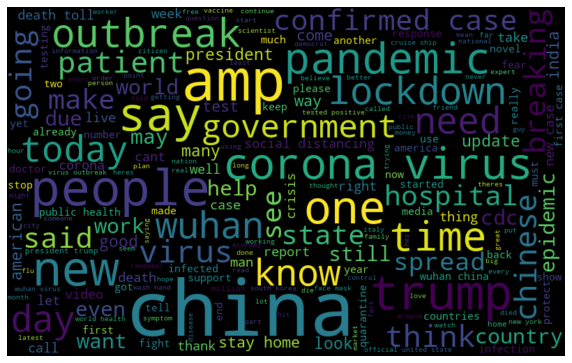

In [11]:
# storing all words from tweets in a list to visualize in wordcoud
all_words = ' '.join([text for text in data['Tweets'].str.join(" ")])

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


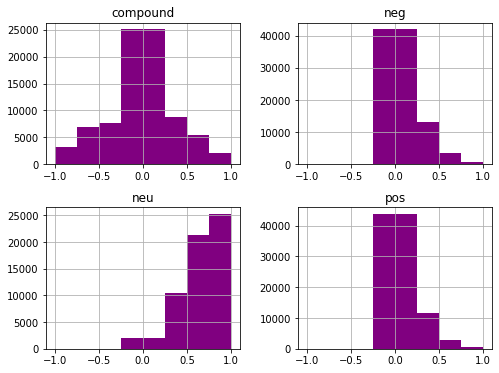

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
data.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],ax=ax,color="purple")

#plt.title("Sentiments from Tweets on Climate Change")
plt.show()

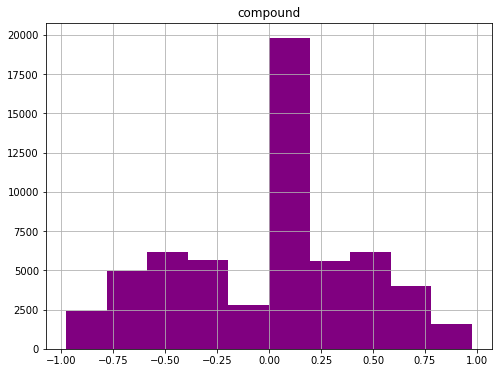

In [14]:
sentiment_df = pd.DataFrame(data, columns=["compound", "Tweets"])
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(ax=ax,color="purple")

#plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [15]:
# function to name a tweet based on compound score and append the list in dataframe 
def Analyze_score(score):
    if score < -0.5:
        return 'Negative'
    elif score > 0.5:
        return 'Positive'
    else:
        return 'Neutral'
data['Analysis'] = data['compound'].apply(Analyze_score)
data.head()

,created_at,text,Tweets,neg,neu,pos,compound,Analysis
0,2020-01-26 03:55:30,RT @mkhairulazri: Although I may agree on not ...,"[may, agree, total, ban, china, tourists, mala...",0.275,0.534,0.191,-0.2732,Neutral
1,2020-01-26 01:56:44,RT @CP24: UPDATED: Man who flew to Toronto fro...,"[updated, man, flew, toronto, china, canadas, ...",0.000,1.000,0.000,0.0000,Neutral
2,2020-01-25 06:47:27,RT @hrluqman: Googled bout the #Coronavirus ju...,"[googled, bout, find, world, plague, every, st...",0.000,1.000,0.000,0.0000,Neutral
3,2020-01-24 02:55:26,@michaeljohns Nothing about #wuhan #virus on t...,"[nothing, front, page, thursday, peoples, dail...",0.000,1.000,0.000,0.0000,Neutral
4,2020-01-28 11:20:55,RT @DarienAlexis3: White people are really mak...,"[white, people, really, making, jokes, outbrea...",0.000,0.754,0.246,0.3134,Neutral


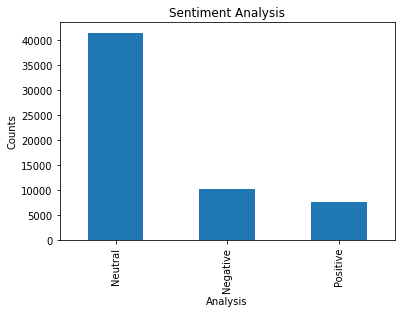

In [16]:
# plotting number of tweets in each sentiment
plt.title('Sentiment Analysis')
plt.xlabel('Analysis')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [17]:
#import matplotlib.pyplot as plt
#plt.hist(data.Analysis, bins = 3, align= 'mid')
#plt.xticks(range(3), ['Negative','Neutral', 'Positive'])
#plt.xlabel('Sentiment of Reviews')
#plt.title('Distribution of Sentiment')
#plt.show()

In [18]:
# creating a month column to group data with month
data['created_at']= data['created_at'].astype('datetime64[ns]')
data['month']=pd.DatetimeIndex(data['created_at']).month
data.head()

,created_at,text,Tweets,neg,neu,pos,compound,Analysis,month
0,2020-01-26 03:55:30,RT @mkhairulazri: Although I may agree on not ...,"[may, agree, total, ban, china, tourists, mala...",0.275,0.534,0.191,-0.2732,Neutral,1
1,2020-01-26 01:56:44,RT @CP24: UPDATED: Man who flew to Toronto fro...,"[updated, man, flew, toronto, china, canadas, ...",0.000,1.000,0.000,0.0000,Neutral,1
2,2020-01-25 06:47:27,RT @hrluqman: Googled bout the #Coronavirus ju...,"[googled, bout, find, world, plague, every, st...",0.000,1.000,0.000,0.0000,Neutral,1
3,2020-01-24 02:55:26,@michaeljohns Nothing about #wuhan #virus on t...,"[nothing, front, page, thursday, peoples, dail...",0.000,1.000,0.000,0.0000,Neutral,1
4,2020-01-28 11:20:55,RT @DarienAlexis3: White people are really mak...,"[white, people, really, making, jokes, outbrea...",0.000,0.754,0.246,0.3134,Neutral,1


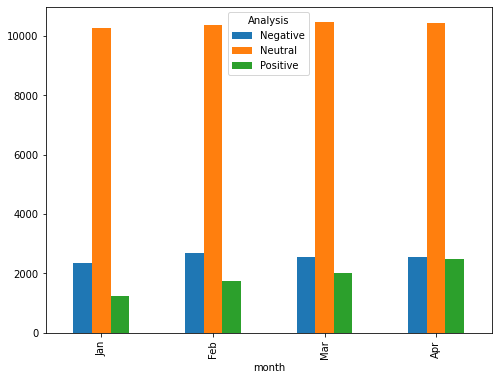

In [19]:
# visualizing sentiments of tweets in each month
fig, ax = plt.subplots(figsize=(8, 6))
tweet_sentiment = data.groupby(['month', 'Analysis']).Analysis.count().unstack()
tweet_sentiment.plot(kind='bar',ax=ax)
ax.set_xticklabels(['Jan','Feb','Mar','Apr'])
plt.show()

In [20]:
data.shape

(59162, 9)